In [1]:
import pandas as pd
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('PrelimVaneTrapSamples.xlsx')
df = df.drop(index=148).reset_index(drop=True)

In [6]:
def add_scale_bar(ax, length=100, location=(0, 0), linewidth=5, units='km', text=True):
    from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker
    import numpy as np
    import cartopy.crs as ccrs

    extent = ax.get_extent(crs=ccrs.PlateCarree())
    map_width_deg = extent[1] - extent[0]

    mid_lat = (extent[2] + extent[3]) / 2

    km_per_deg_at_lat = np.cos(np.radians(mid_lat)) * 111.32

    map_width_km = map_width_deg * km_per_deg_at_lat

    scale_bar_length_deg = (length / map_width_km) * map_width_deg
    
    x_start = location[0] * map_width_deg + extent[0]
    x_end = x_start + scale_bar_length_deg
    y_position = location[1] * (extent[3] - extent[2]) + extent[2]

    ax.plot([x_start, x_end], [y_position, y_position], transform=ccrs.PlateCarree(), color='k', linewidth=linewidth)
    
    if text==True:
        ax.text(x_end, y_position, ' '+f'{length} {units}', verticalalignment='bottom', horizontalalignment='left', transform=ccrs.Geodetic(), fontsize=10)


In [8]:
import geopandas as gpd
from shapely.geometry import Point
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from rasterio.warp import calculate_default_transform, reproject, Resampling

lakes = cfeature.NaturalEarthFeature(category='physical', name='lakes', scale='110m')

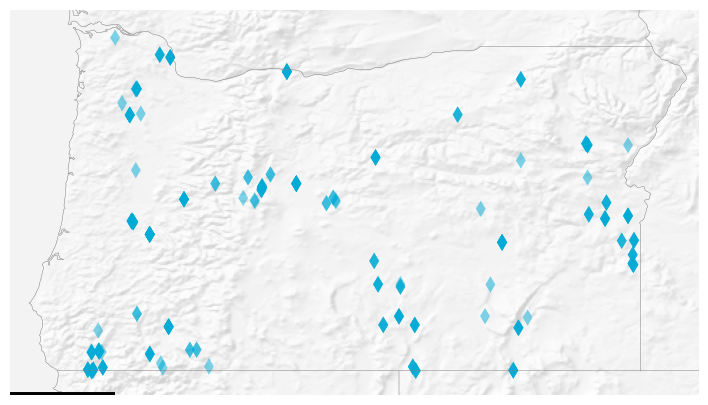

In [17]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_xlim(-124.8, -116.3)
ax.set_ylim(41.7, 46.45)

# ax.add_feature(cfeature.LAND, facecolor='#DBDBDB', edgecolor='#DBDBDB', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.STATES, linewidth=.2, edgecolor='gray')
# ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

with rasterio.open('SR_HR.tif') as src:
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
    ax.imshow(src.read(1), extent=extent, transform=ccrs.PlateCarree(), cmap='gray', alpha=0.2)

scatter = ax.scatter(df['Longitude'], df['Latitude'], transform=ccrs.PlateCarree(), marker='d', facecolors='#00abd6', edgecolors='none', lw=.8, s=70, alpha=0.5)
ax.axis('off')

add_scale_bar(ax=ax, length=100, location=(0,0), text=False)

# plt.savefig('figures/maps/eur_temp_map.png', bbox_inches='tight', pad_inches=0, format='png', dpi=300)
plt.savefig('BVT_map_large.svg', bbox_inches='tight', pad_inches=0, format='svg', dpi=300)